In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [53]:
DARTs = [21414, 21419, 21401, 21418, 21413, 52403, 52406, 55012, 51425, 51407,
        46404, 46407, 46411, 46412, 43412, 43413, 32411, 32412,32413,32401]

darts = {}
for dart in DARTs:
    darts[dart] = np.loadtxt('../data/tsunamiDART{}'.format(dart))

In [3]:
tseries5min = pd.read_json('../calculations//pois_5min')
tseries4min = pd.read_json('../calculations//pois_4min')
tseries3min = pd.read_json('../calculations//pois_3min')

In [4]:
tseries5min.head()

21401              21413  \
closestDeepPoint                        []                 []   
depth                                 5257               5906   
location                 [152.583, 42.617]  [152.132, 30.533]   
pixel                          [751, 1351]        [745, 1206]   
shallowCorrectionFactor                  1                  1   

                                     21414              21418  \
closestDeepPoint                        []                 []   
depth                                 5400               5717   
location                 [178.219, 48.968]  [148.645, 38.727]   
pixel                         [1058, 1427]        [703, 1304]   
shallowCorrectionFactor                  1                  1   

                                     21419               32401  \
closestDeepPoint                        []                  []   
depth                                 5313                4805   
location                 [155.717, 44.435]  [286.579, -20.474]   
pixel                          [788, 1372]         [2358, 594]   
shallowCorrectionFactor                  1                   1   

                                   32411               32412  \
closestDeepPoint                      []                  []   
depth                               3170                4372   
location                 [269.12, 4.953]  [273.626, -17.984]   
pixel                        [2149, 899]         [2203, 624]   
shallowCorrectionFactor                1                   1   

                                     32413                         43412  \
closestDeepPoint                        []                            []   
depth                                 3872                          3148   
location                 [266.483, -7.406]  [253.03300000000002, 16.045]   
pixel                          [2117, 751]                  [1956, 1032]   
shallowCorrectionFactor                  1                             1   

                                                43413              46404  \
closestDeepPoint                                   []                 []   
depth                                            4011               2763   
location                 [259.91700000000003, 11.012]  [231.267, 45.853]   
pixel                                     [2038, 972]       [1694, 1389]   
shallowCorrectionFactor                             1                  1   

                                     46407              46411  \
closestDeepPoint                        []                 []   
depth                                 3320               4302   
location                 [231.168, 42.682]  [232.933, 39.333]   
pixel                         [1693, 1351]       [1714, 1311]   
shallowCorrectionFactor                  1                  1   

                                     46412             51407  \
closestDeepPoint                        []                []   
depth                                 3811              4773   
location                 [239.437, 32.492]  [203.455, 19.57]   
pixel                         [1792, 1229]      [1361, 1074]   
shallowCorrectionFactor                  1                 1   

                                    51425           52403              52406  \
closestDeepPoint                       []              []                 []   
depth                                4754            4482               1845   
location                 [183.68, -9.517]  [145.52, 4.02]  [164.977, -5.307]   
pixel                         [1124, 725]      [666, 888]         [899, 776]   
shallowCorrectionFactor                 1               1                  1   

                                      55012  
closestDeepPoint                         []  
depth                                  3212  
location                 [158.453, -15.664]  
pixel                            [821, 652]  
shallowCorrectionFactor                   1

In [58]:
rangos = {
    52403: [4,10],
    52406: [4,10],
    55012: [7,13],
    51407: [7,13],
    51425: [7,13],
    46404: [6,12],
    46407: [6,12],
    46411: [6,12],
    46412: [6, 12],
    43412: [12, 18],
    43413: [14, 20],
    32411: [16,22],
    32412: [18,24],
    32413: [16,22],
    32401: [20,26],
    21414: [0,6],
    21419: [0,3],
    21401: [0,3],
    21418: [0,6] ,
    21413: [0,6]
}

21401


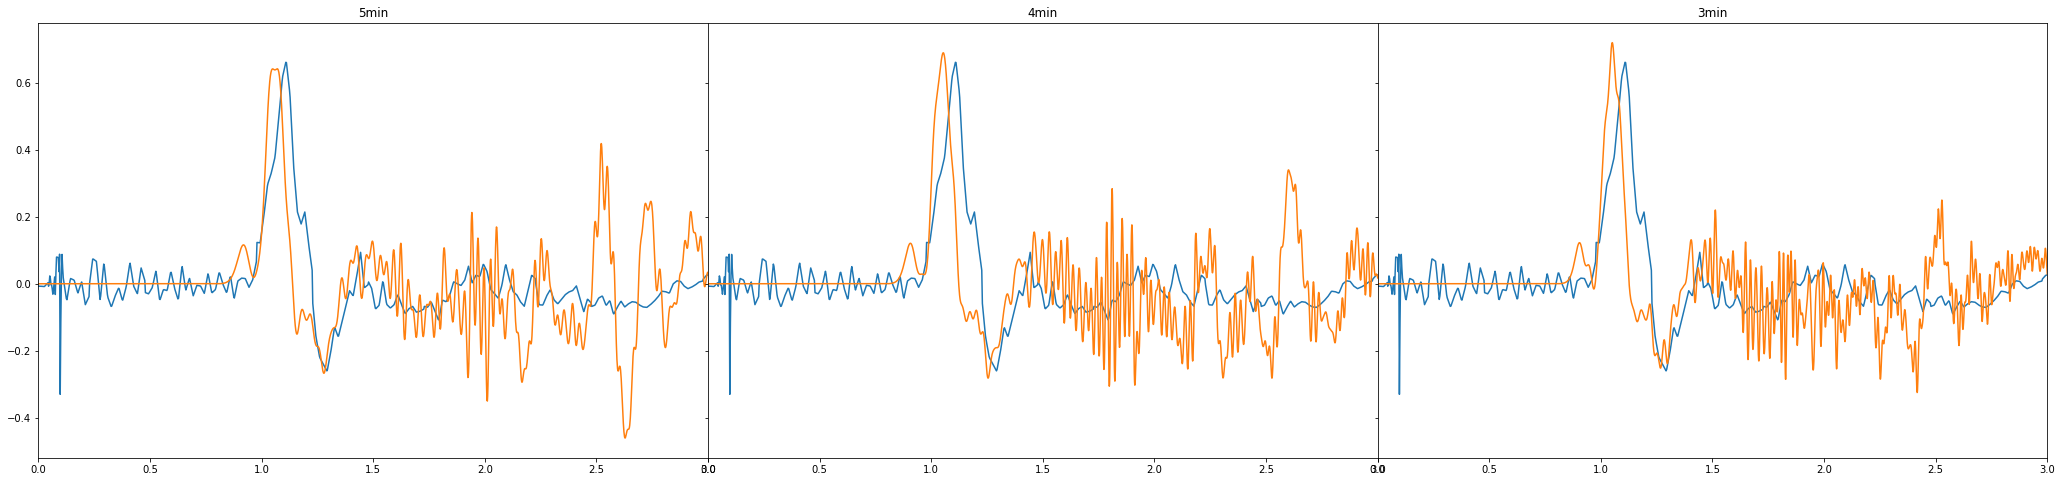

21413


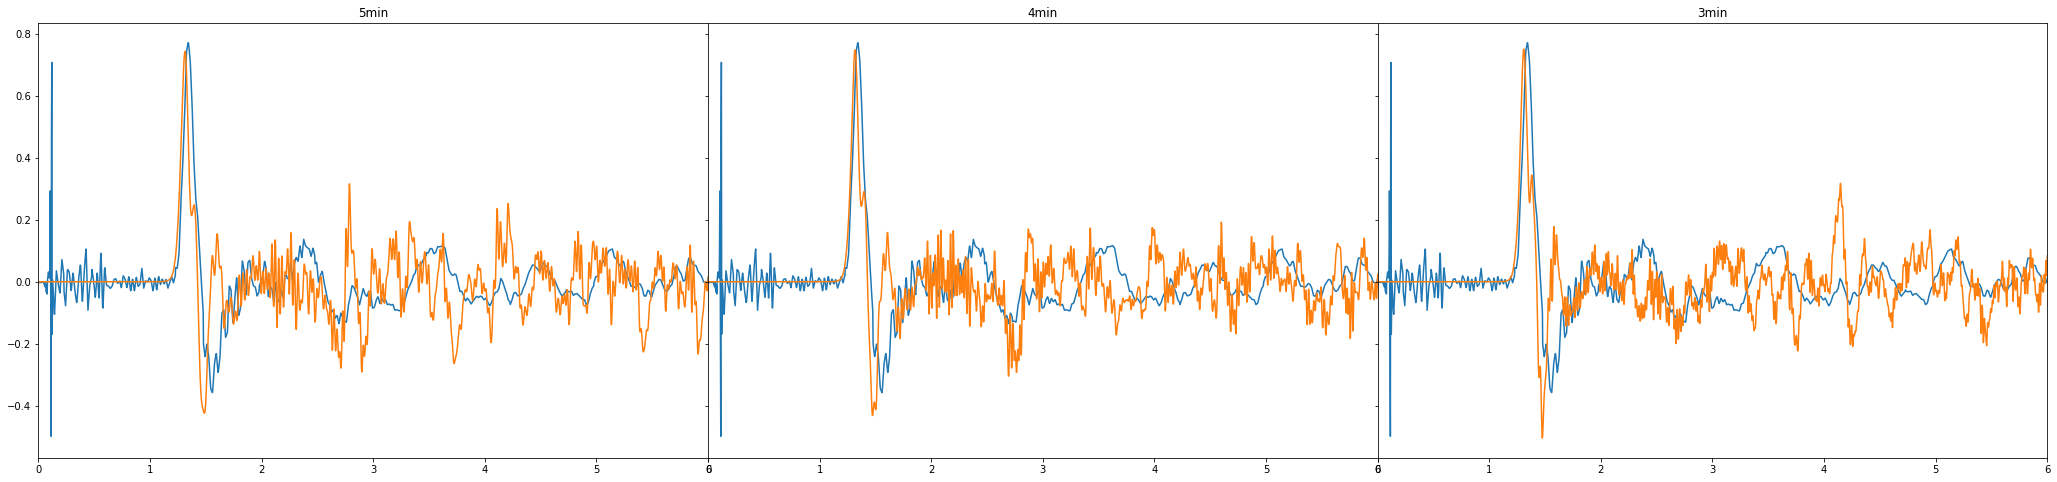

21414


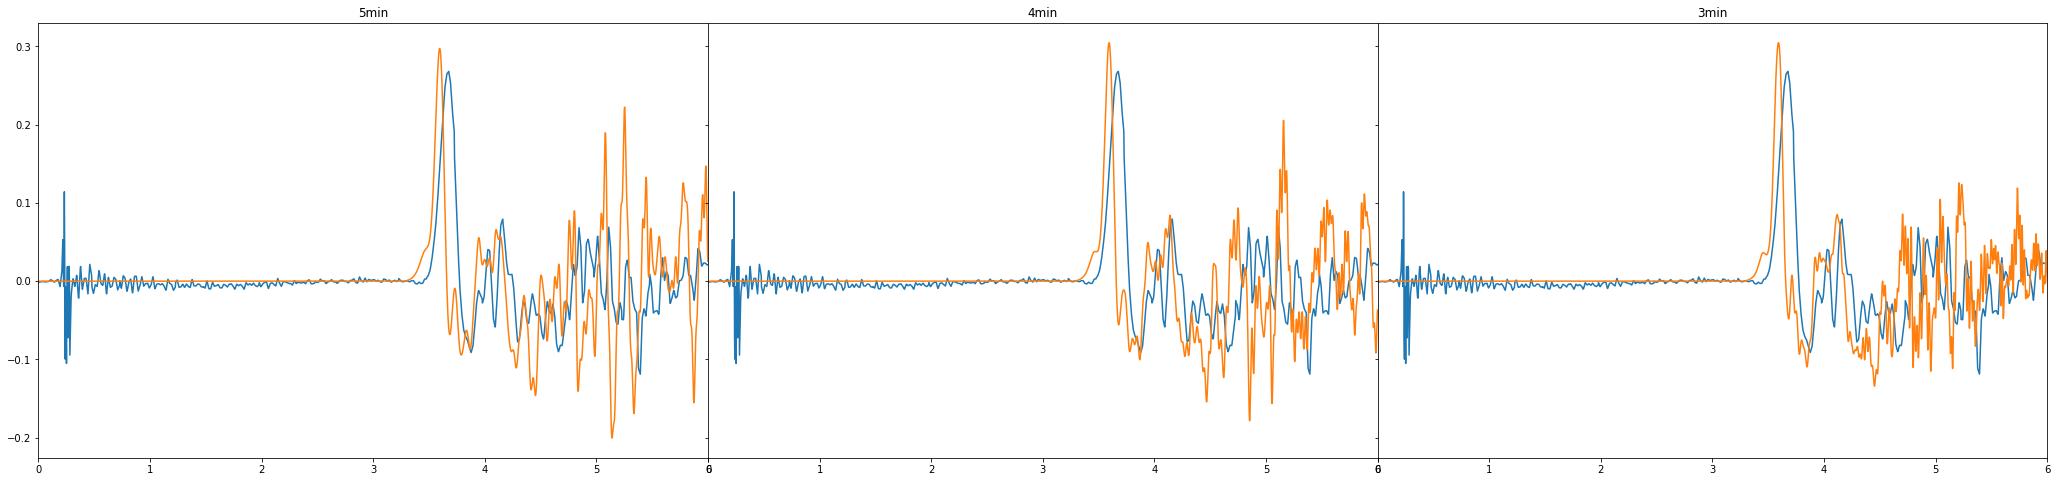

21418


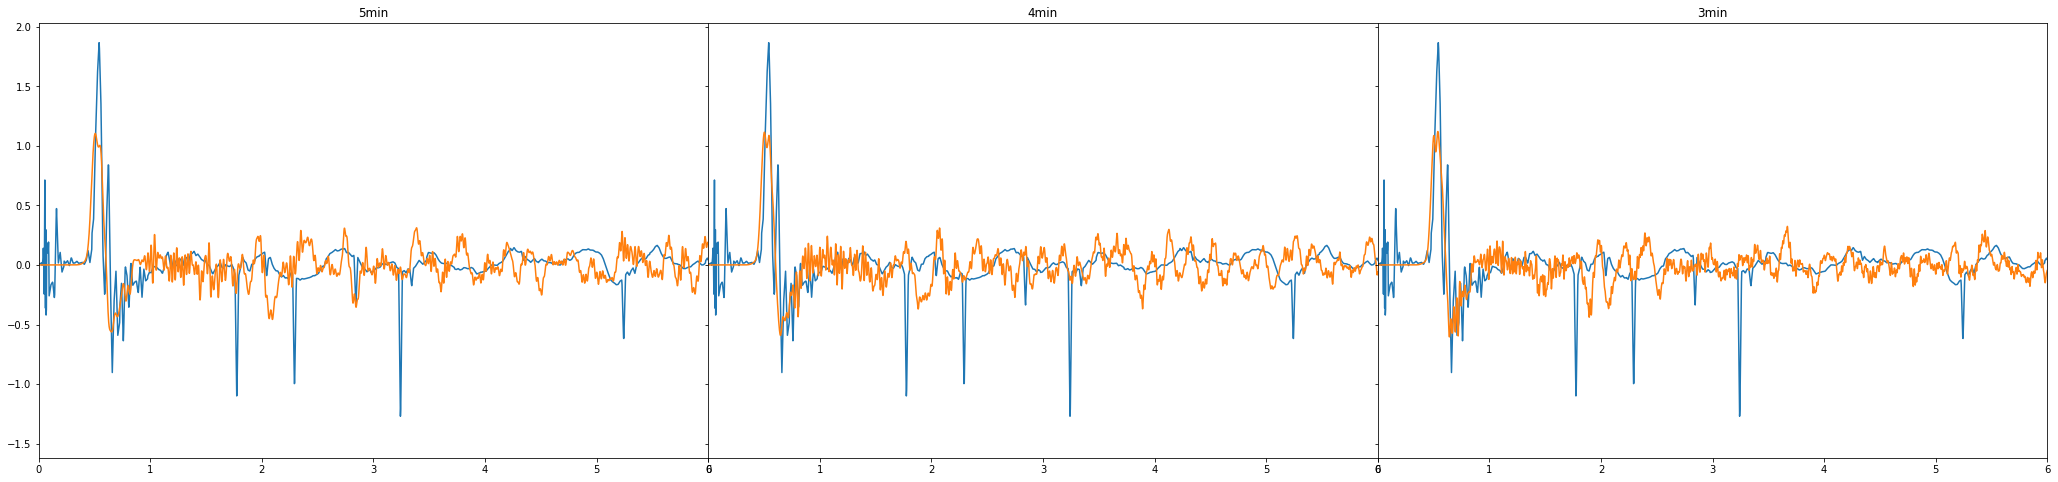

21419


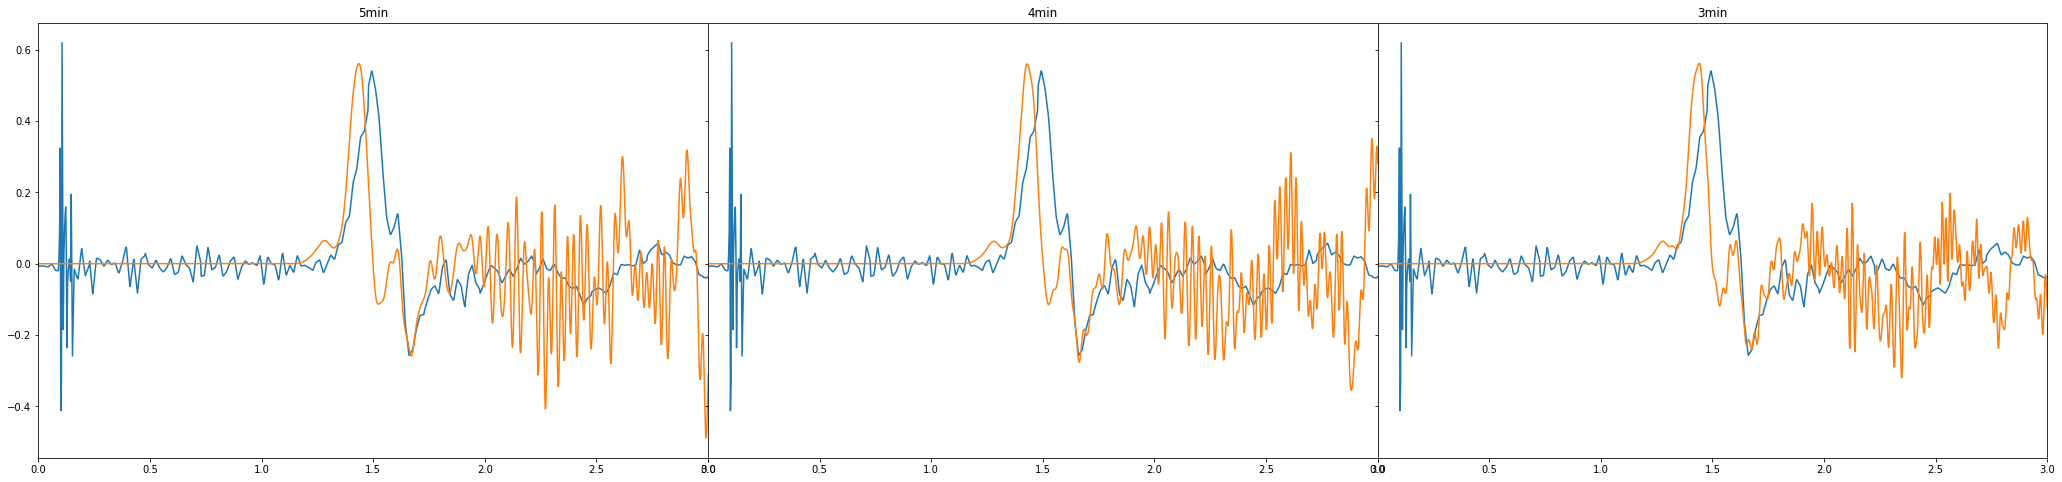

32401


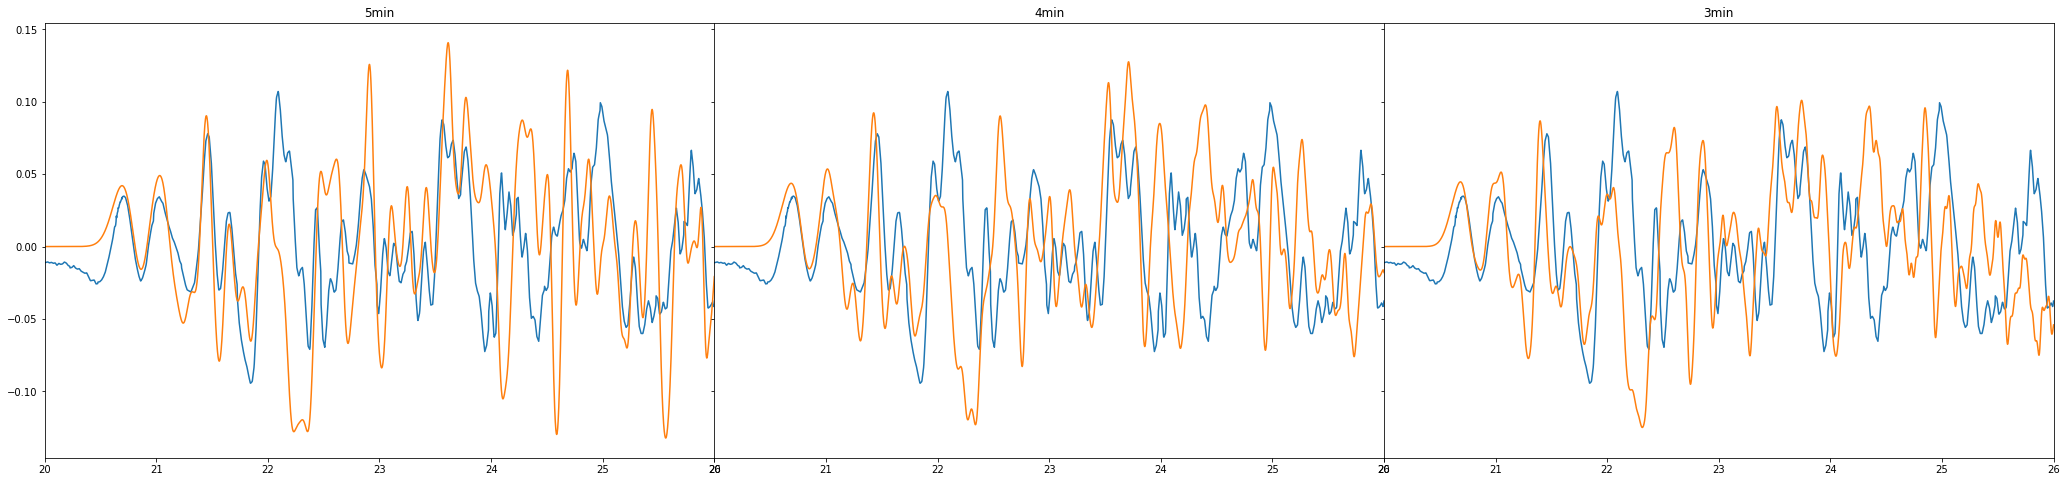

32411


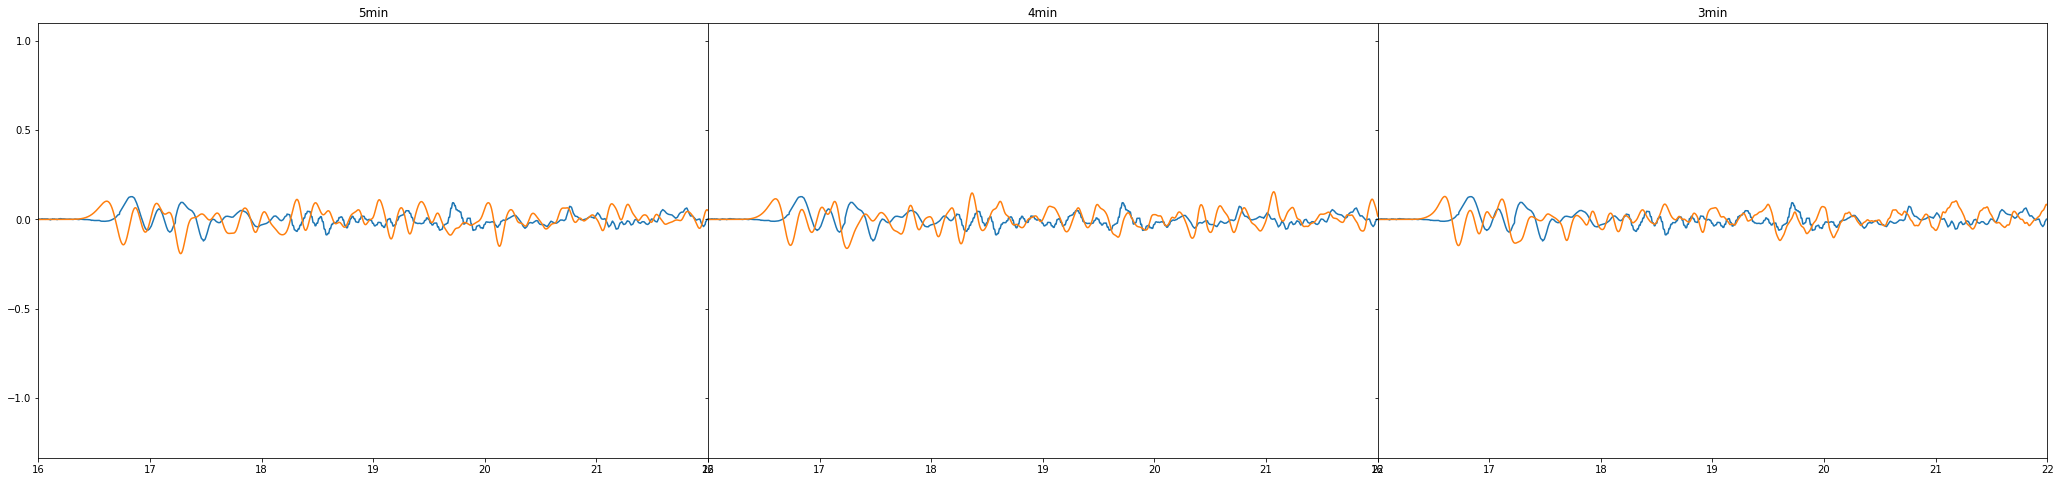

32412


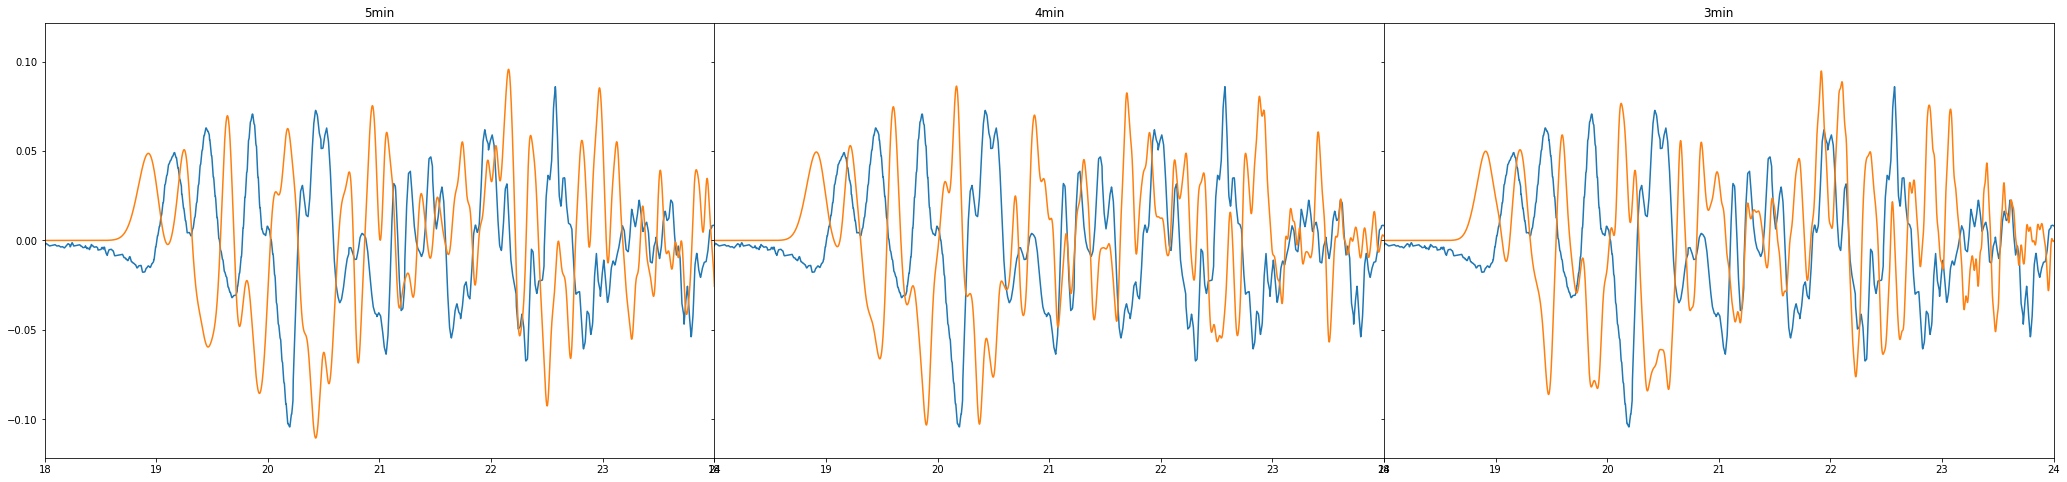

32413


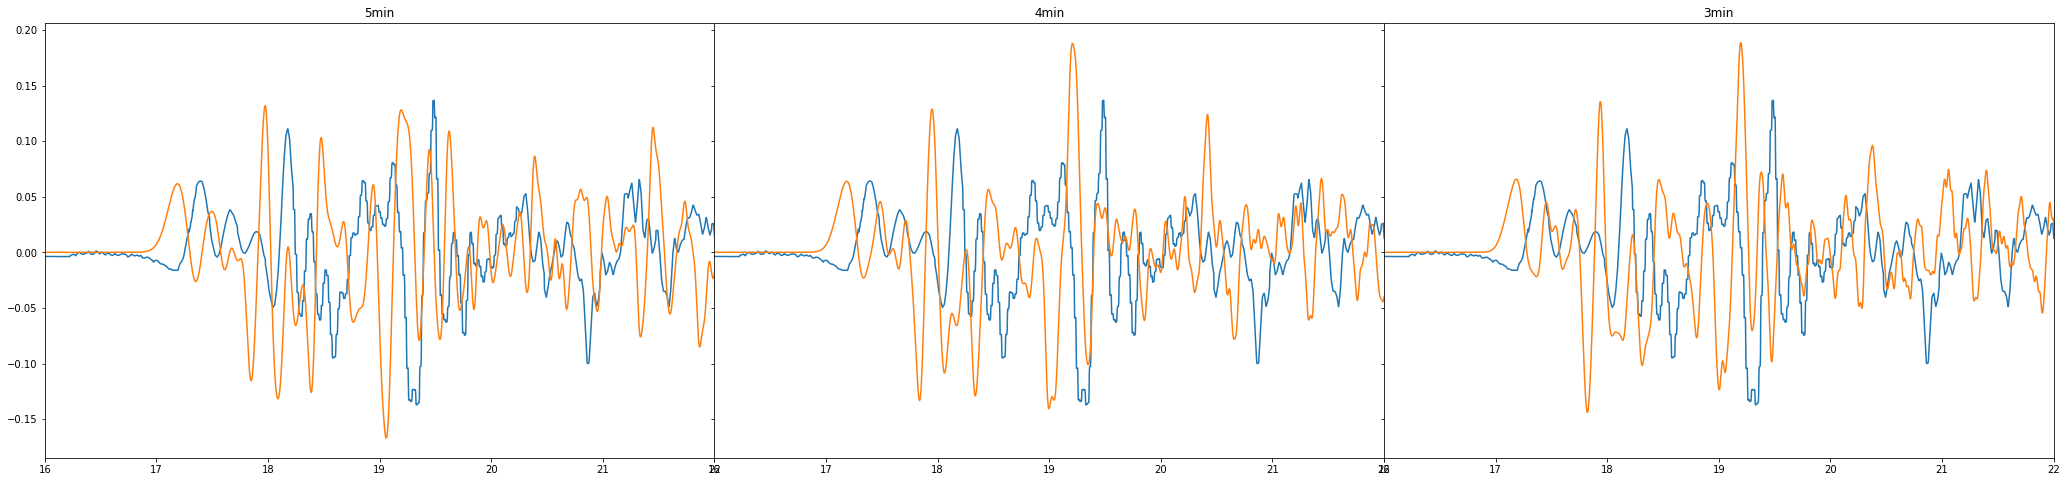

43412


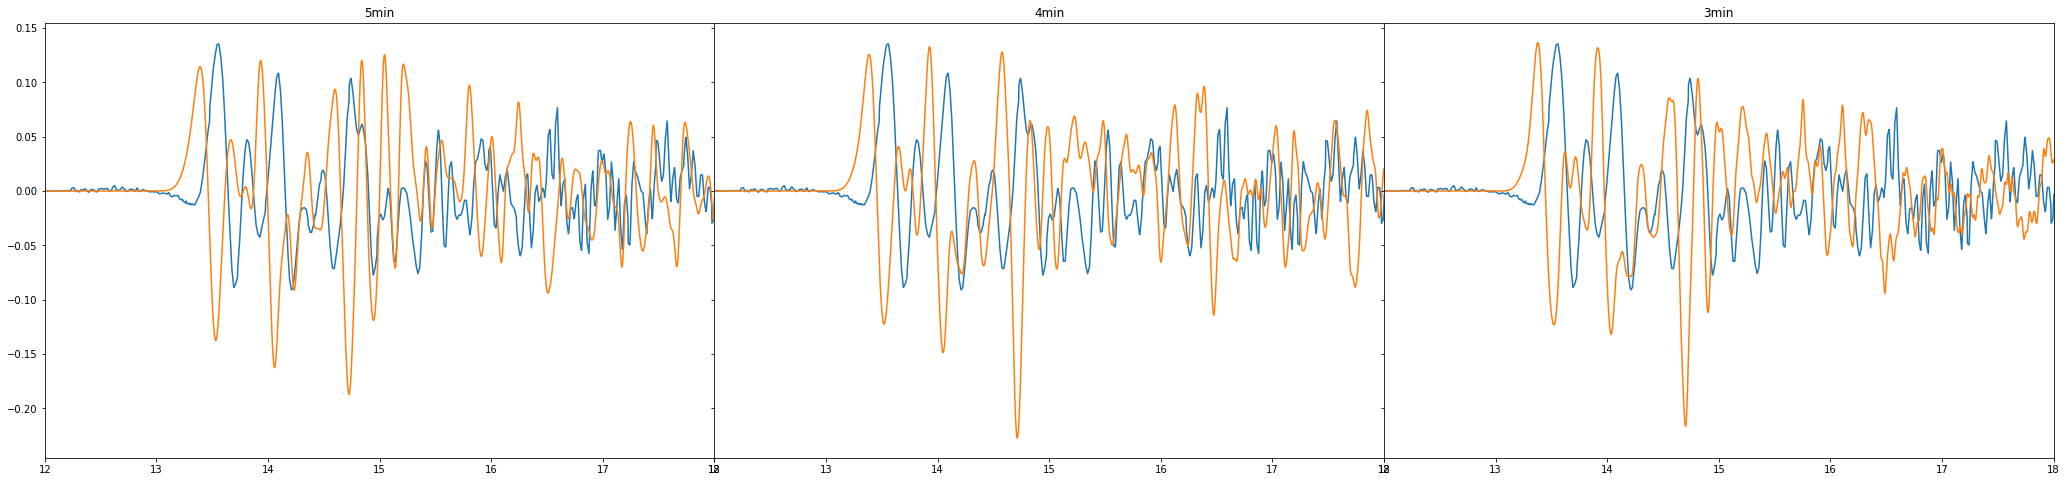

43413


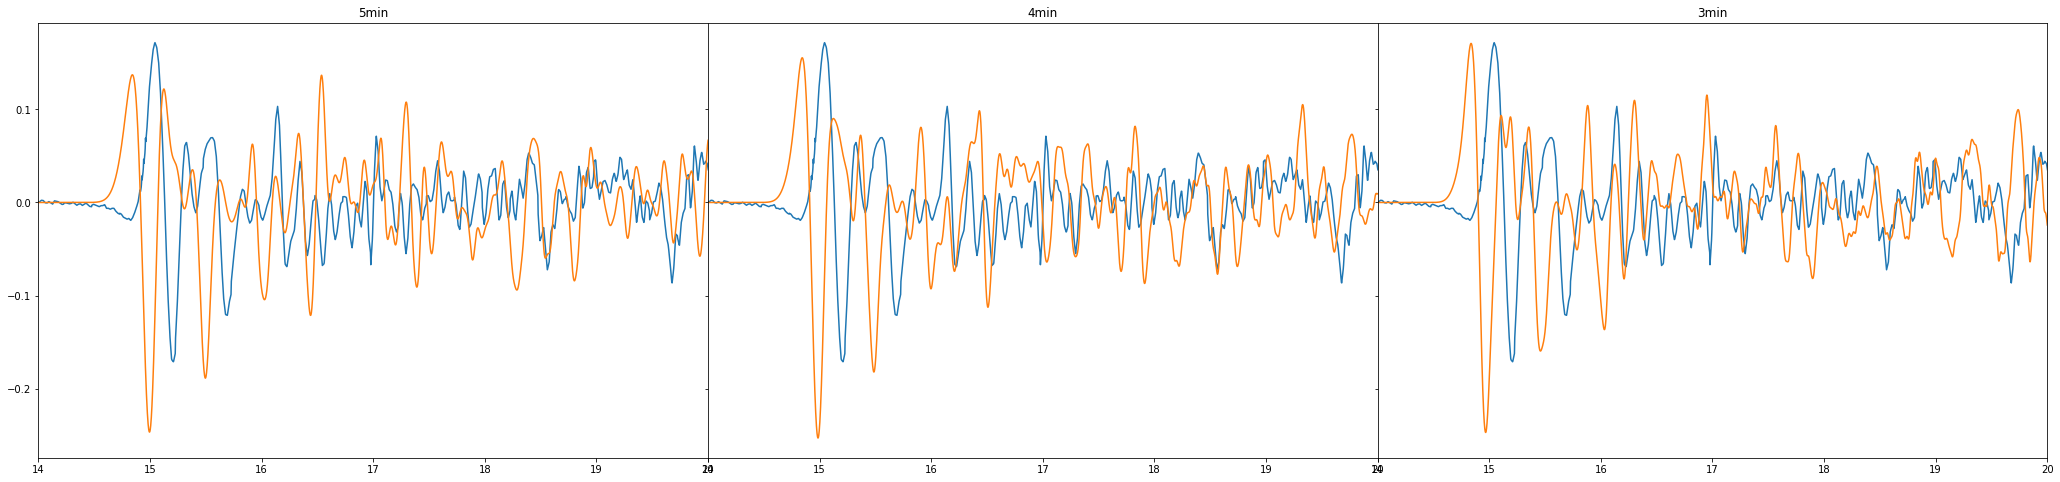

46404


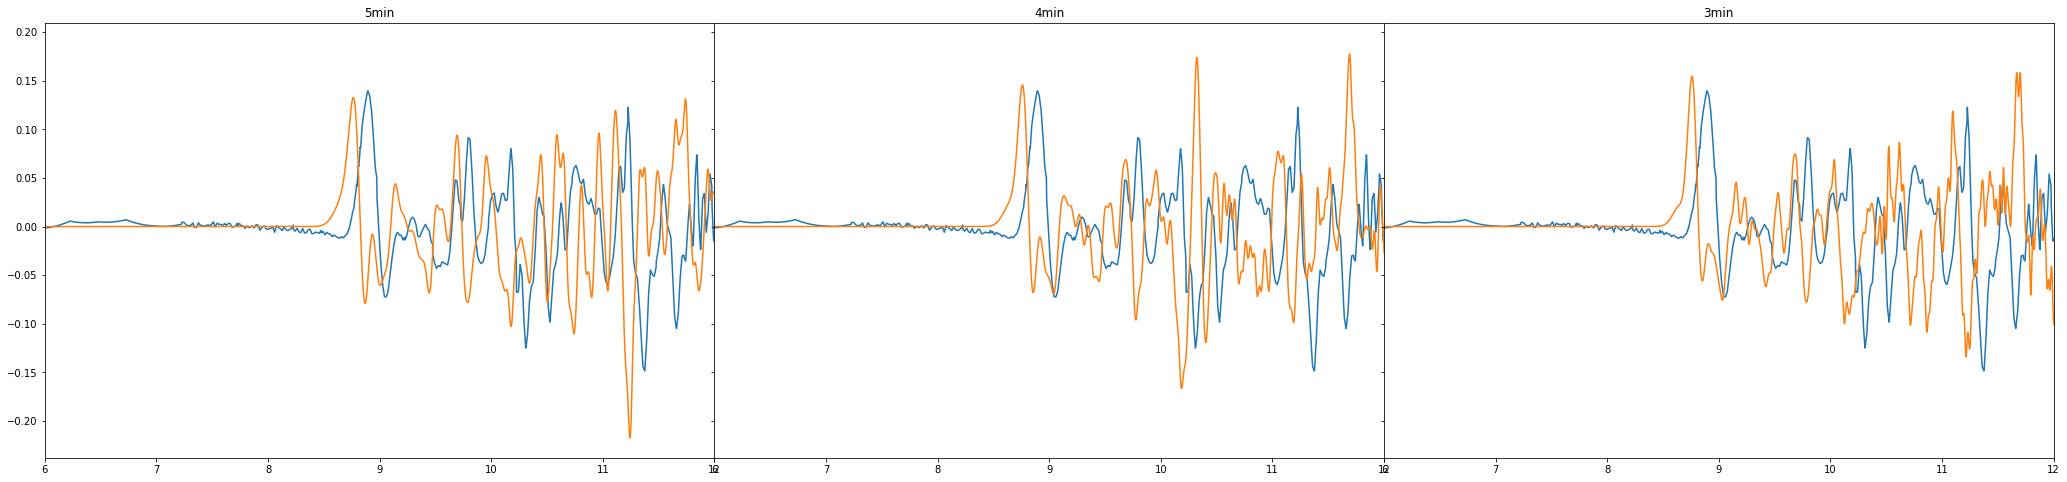

46407


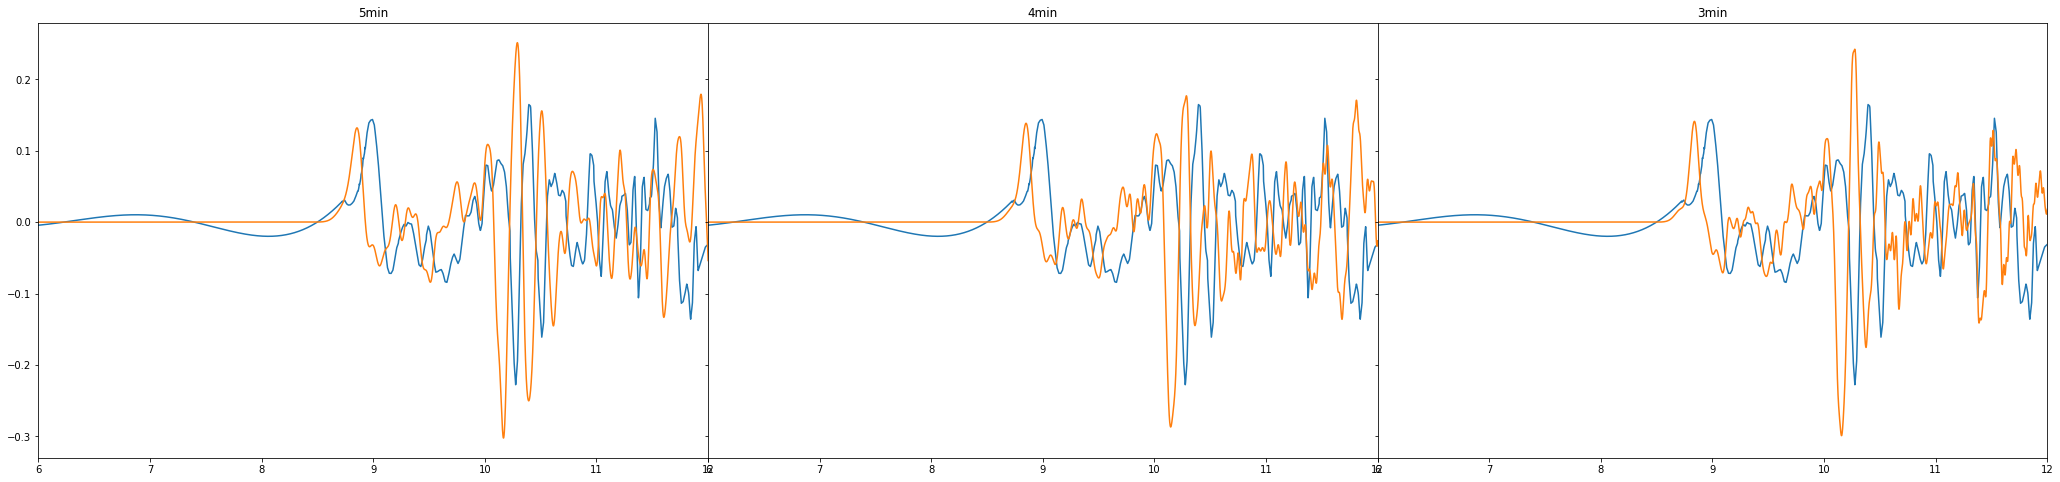

46411


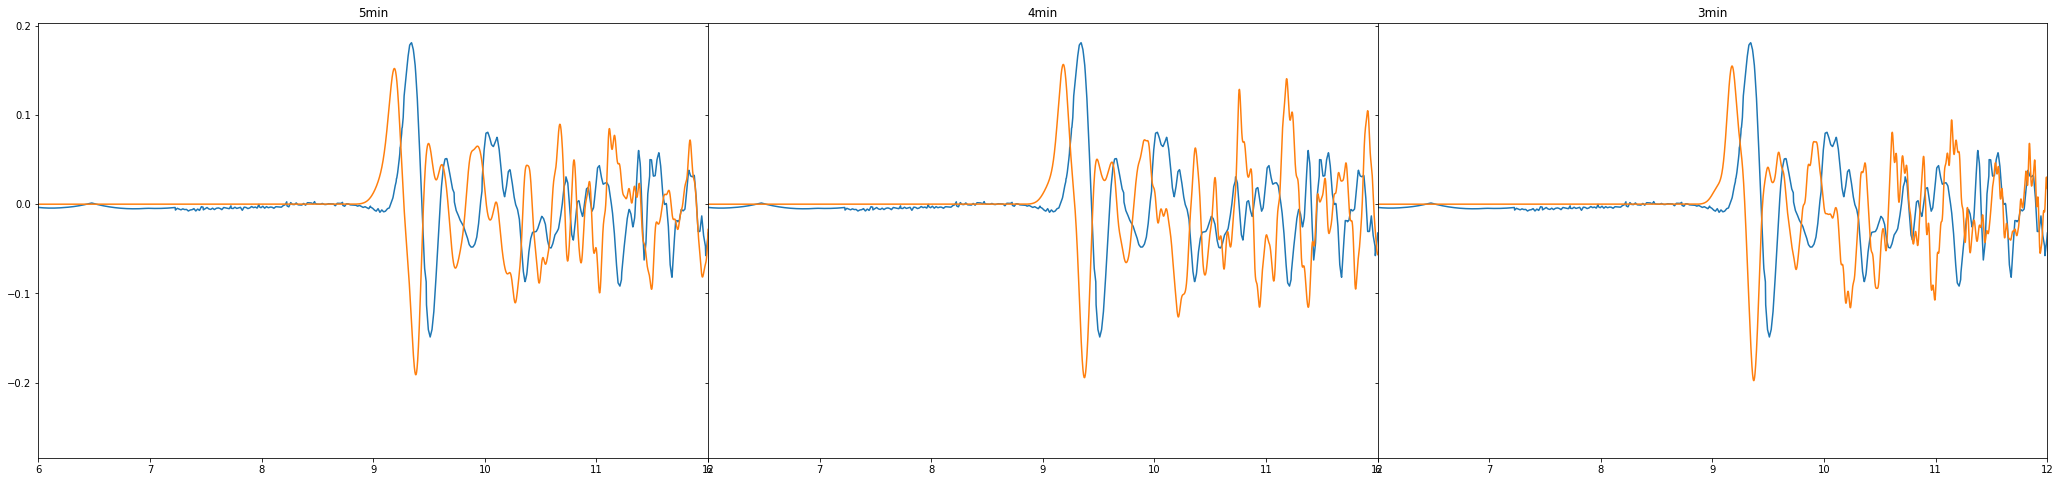

46412


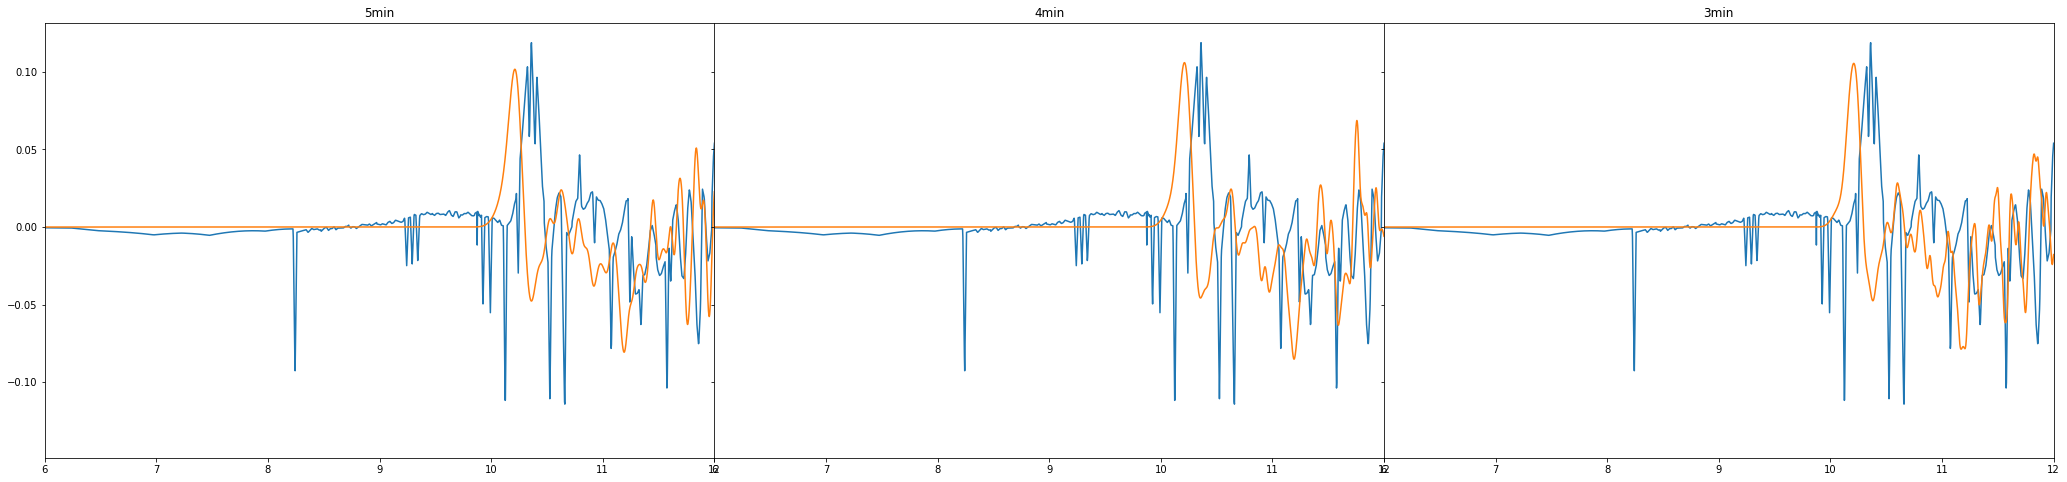

51407


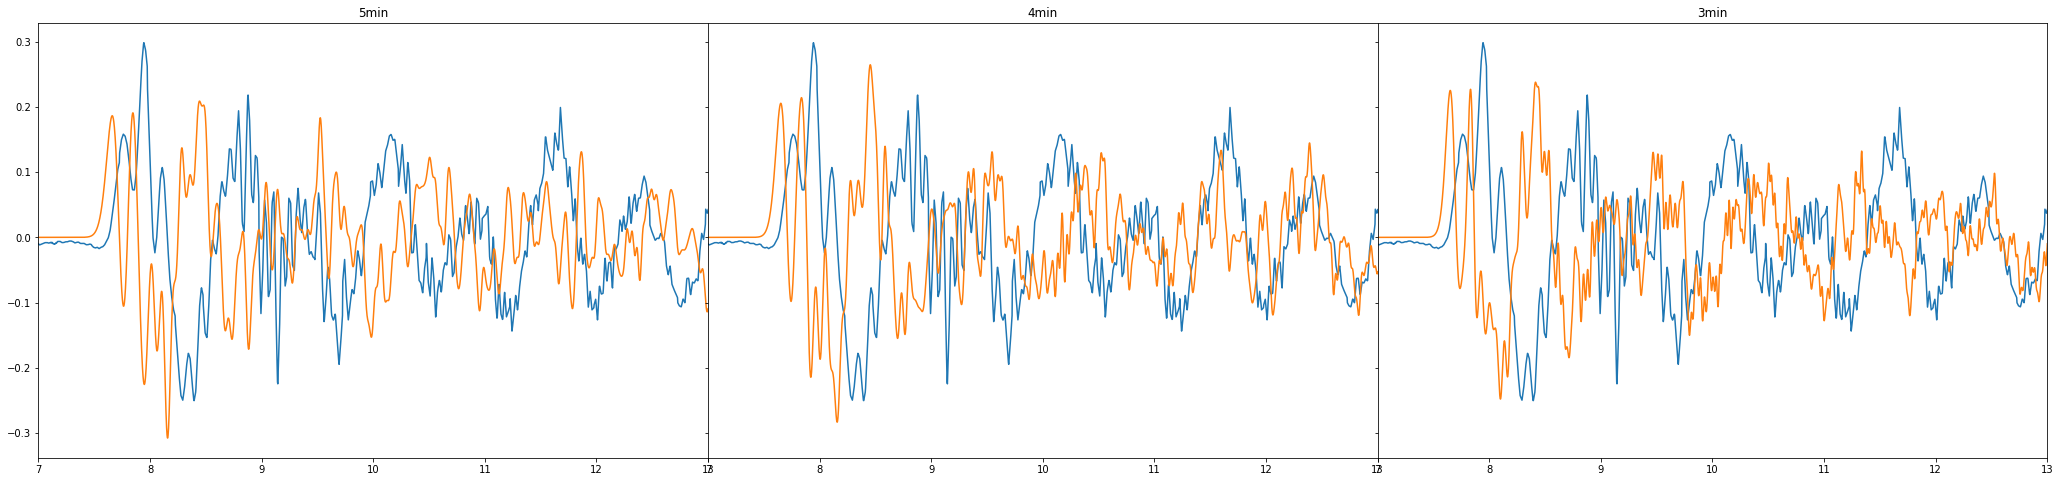

51425


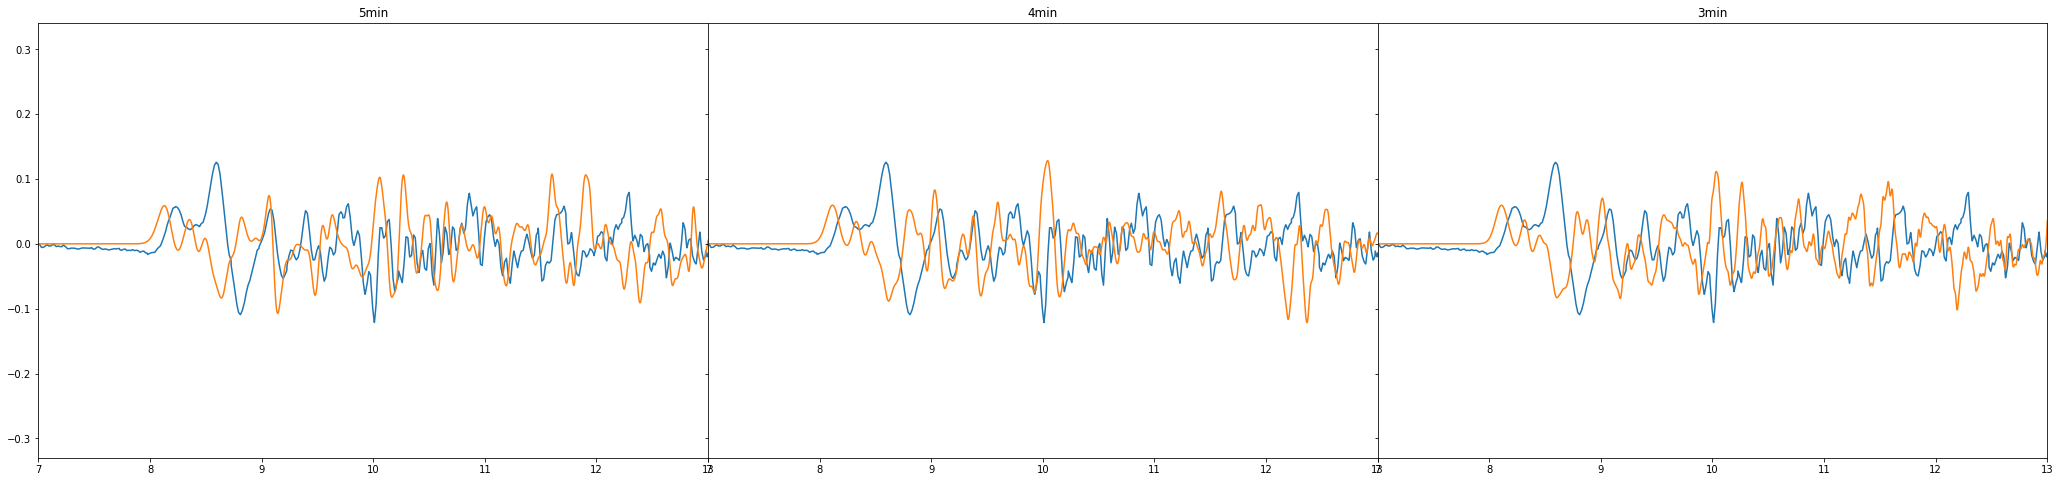

52403


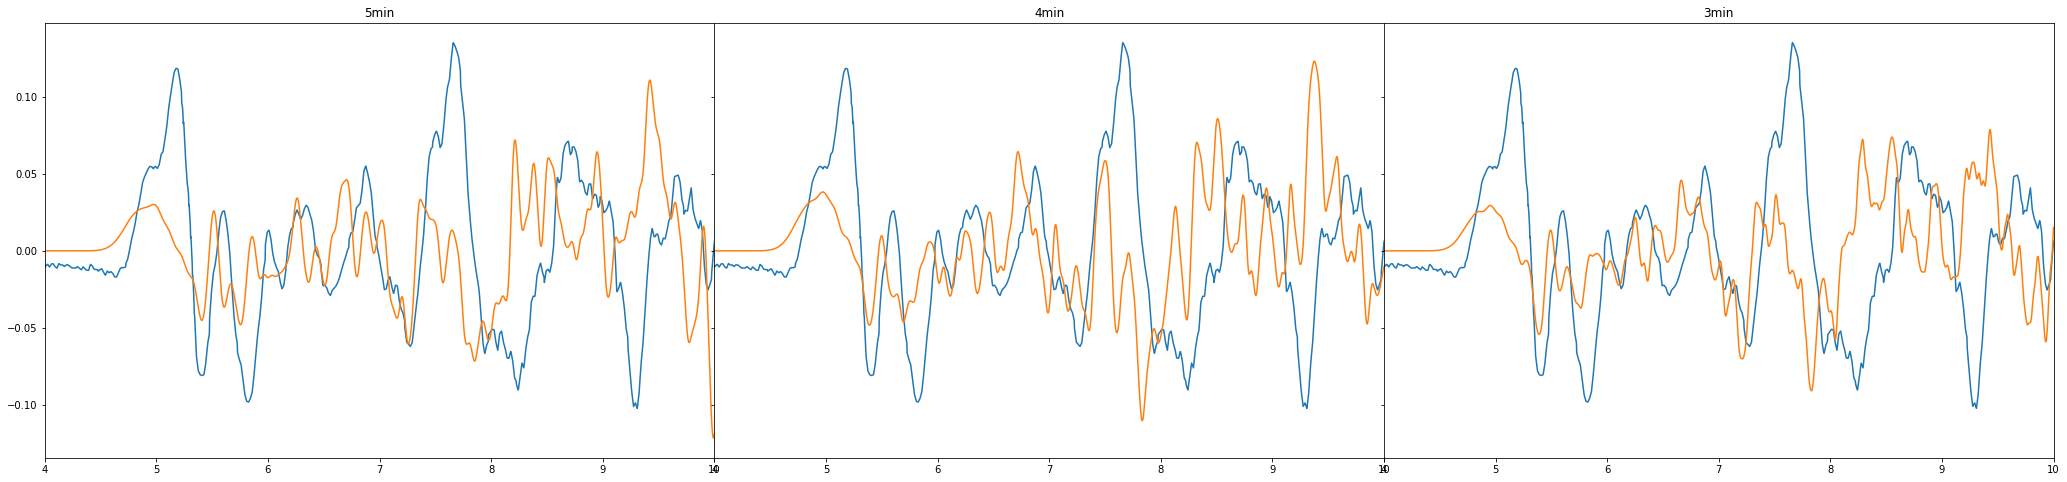

52406


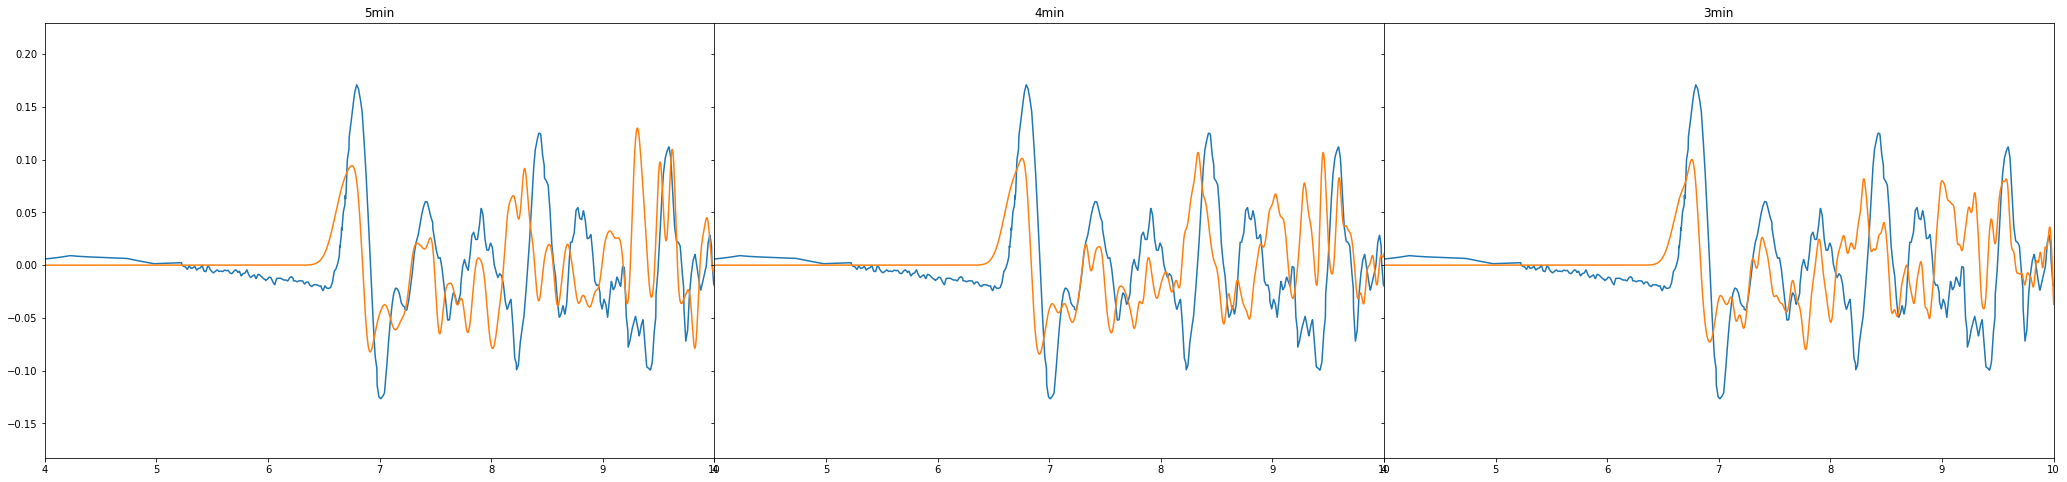

55012


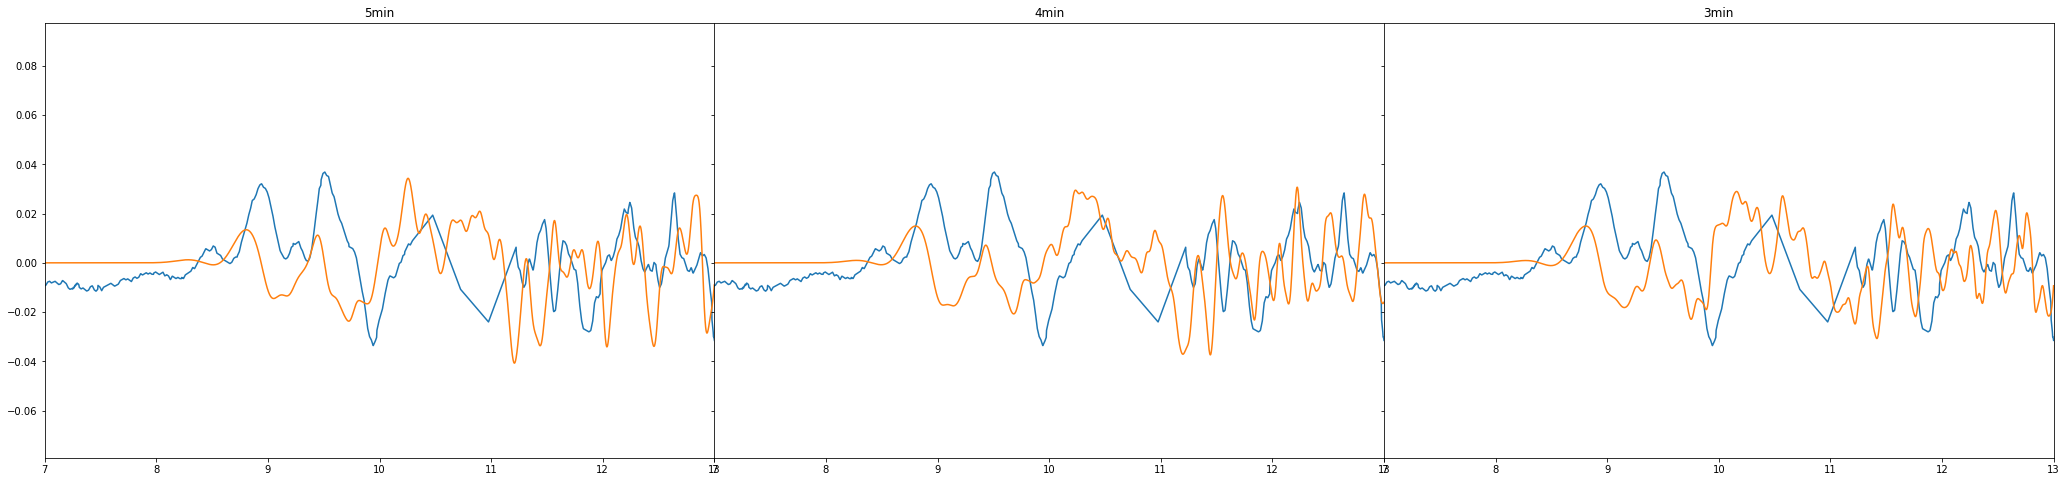

In [70]:
for dart in tseries5min.columns:    
    d = 1.5*np.array(tseries3min[dart]['surface']).max()
    
    lw = 1.5
    f, (ax1, ax2, ax3) = plt.subplots(nrows=1,ncols=3, sharex=True, sharey=True, figsize=(9*4,2*4))
    
    ax1.plot(darts[dart][:,0]*24,darts[dart][:,1], lw=lw,label='measurement')
    ax1.plot(np.array(tseries5min[dart]['time'])/60/60, 
             tseries5min[dart]['surface'], lw =lw)#, lw=0.1)
    ax1.set_xlim(rangos[dart][0], rangos[dart][1])
    ax1.set_title('5min')
    
    
    
    ax2.plot(darts[dart][:,0]*24,darts[dart][:,1], lw=lw,label='measurement')
    ax2.plot(np.array(tseries4min[dart]['time'])/60/60, 
             tseries4min[dart]['surface'], lw = lw)
    ax2.set_xlim(rangos[dart][0], rangos[dart][1])
    ax2.set_title('4min')
    
    
    ax3.plot(darts[dart][:,0]*24,darts[dart][:,1], lw=lw,label='measurement')
    ax3.plot(np.array(tseries3min[dart]['time'])/60/60, 
             tseries3min[dart]['surface'], lw = lw)
    ax3.set_xlim(rangos[dart][0], rangos[dart][1])
    ax3.set_title('3min')
    
    f.subplots_adjust(wspace=0,hspace=0)
    
    print(dart)
    plt.show()